In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv("01022023.csv")
df

Time      expiry        Date                   Ticker  \
0        91559  2023-02-23  01-02-2023              BANKNIFTY-I   
1        91559  2023-03-29  01-02-2023             BANKNIFTY-II   
2        91559  2023-04-27  01-02-2023            BANKNIFTY-III   
3        91559  2023-02-02  01-02-2023  BANKNIFTY02FEB2335500PE   
4        91559  2023-02-02  01-02-2023  BANKNIFTY02FEB2336000PE   
...        ...         ...         ...                      ...   
274851  153059  2023-03-29  01-02-2023  BANKNIFTY29MAR2348000CE   
274852  153059  2023-03-29  01-02-2023  BANKNIFTY29MAR2348000PE   
274853  153059  2023-03-29  01-02-2023  BANKNIFTY29MAR2348500CE   
274854  153059  2023-03-29  01-02-2023  BANKNIFTY29MAR2349500CE   
274855  153059  2023-03-29  01-02-2023  BANKNIFTY29MAR2351000CE   

        expiry_sequence  EXPIRY_DATE  STRIKE_PR OPTION_TYP      Open  \
0                     0           -1          0         XX  41500.00   
1                     1           -1          0         XX  41555.20   
2                     2           -1          0         XX  41655.50   
3                     0            2      35500         PE      5.00   
4                     0            2      36000         PE      5.90   
...                 ...          ...        ...        ...       ...   
274851                5           29      48000         CE     26.35   
274852                5           29      48000         PE   6769.15   
274853                5           29      48500         CE     85.00   
274854                5           29      49500         CE     20.20   
274855                5           29      51000         CE     25.00   

            High       Low     Close    Volume         OI  synthetic  \
0       41500.00  41200.05  41292.25  112600.0  2667275.0       0.00   
1       41655.35  41404.75  41496.00    3625.0   244050.0       0.00   
2       41700.00  41575.40  41650.00    1250.0    39525.0       0.00   
3           5.45      4.15      5.30  100625.0  1073225.0   41076.25   
4           6.70      4.70      6.40   69150.0   762625.0   41076.25   
...          ...       ...       ...       ...        ...        ...   
274851     26.35     26.35     26.35     400.0    32850.0   40947.40   
274852   6769.15   6769.15   6769.15      25.0      275.0   40947.40   
274853     85.00     85.00     85.00      50.0       25.0   40947.40   
274854     20.20     20.20     20.20      50.0    10625.0   40947.40   
274855     25.00     25.00     25.00     125.0      800.0   40947.40   

        syn_STRIKE_PR  atm_straddle  
0                   0          0.00  
1                   0          0.00  
2                   0          0.00  
3               41100        964.25  
4               41100        964.25  
...               ...           ...  
274851          41000       2512.60  
274852          41000       2512.60  
274853          41000       2512.60  
274854          41000       2512.60  
274855          41000       2512.60  

[274856 rows x 17 columns]

In [3]:
# Convert 'expiry' and 'Date' columns to datetime
df['expiry'] = pd.to_datetime(df['expiry'], format='%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
 
df['DTE'] = (df['expiry'] - df['Date']).dt.days /365
 

In [4]:
df.head(10)

Time     expiry       Date                   Ticker  expiry_sequence  \
0  91559 2023-02-23 2023-02-01              BANKNIFTY-I                0   
1  91559 2023-03-29 2023-02-01             BANKNIFTY-II                1   
2  91559 2023-04-27 2023-02-01            BANKNIFTY-III                2   
3  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2335500PE                0   
4  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2336000PE                0   
5  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2336500PE                0   
6  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337000CE                0   
7  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337000PE                0   
8  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337500CE                0   
9  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337500PE                0   

   EXPIRY_DATE  STRIKE_PR OPTION_TYP      Open      High       Low     Close  \
0           -1          0         XX  41500.00  41500.00  41200.05  41292.25   
1           -1          0         XX  41555.20  41655.35  41404.75  41496.00   
2           -1          0         XX  41655.50  41700.00  41575.40  41650.00   
3            2      35500         PE      5.00      5.45      4.15      5.30   
4            2      36000         PE      5.90      6.70      4.70      6.40   
5            2      36500         PE      5.25      9.00      5.25      8.15   
6            2      37000         CE   4138.25   4138.25   4138.25   4138.25   
7            2      37000         PE      9.95     11.70      7.85     10.15   
8            2      37500         CE   3641.55   3641.55   3641.55   3641.55   
9            2      37500         PE     14.50     15.45     11.10     13.05   

     Volume         OI  synthetic  syn_STRIKE_PR  atm_straddle       DTE  
0  112600.0  2667275.0       0.00              0          0.00  0.060274  
1    3625.0   244050.0       0.00              0          0.00  0.153425  
2    1250.0    39525.0       0.00              0          0.00  0.232877  
3  100625.0  1073225.0   41076.25          41100        964.25  0.002740  
4   69150.0   762625.0   41076.25          41100        964.25  0.002740  
5  178250.0  1661450.0   41076.25          41100        964.25  0.002740  
6      50.0      700.0   41076.25          41100        964.25  0.002740  
7  173625.0  1427650.0   41076.25          41100        964.25  0.002740  
8      50.0      925.0   41076.25          41100        964.25  0.002740  
9  123650.0  1263400.0   41076.25          41100        964.25  0.002740

In [5]:
# creating the bucket 
 
df_first_hr=df.loc[(df.index<=45000)]
 
df_second_hr=df.loc[((df.index<=90000) &(  df.index>=45000))]
df_third_hr=df.loc[((df.index>=90000) &(  df.index<=135000))]
df_fourth_hr=df.loc[((df.index>=135000) &(  df.index<=180000))]
df_fiveth_hr=df.loc[((df.index>=180000) &(  df.index<=225000))]
df_sixth_hr=df.loc[(df.index>=225000)]
 
 
df_first_15_min=df.loc[(df.index<=11000)]
df_first_5_min=df.loc[(df.index<=3600)]
 
 

In [6]:

import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import brentq
 
# Black-Scholes Pricing Functions
def bs_call_price(S, K, T, r, sigma, q=0):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
 
def bs_put_price(S, K, T, r, sigma, q=0):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
 
# Implied Volatility Function
def implied_volatility(price, S, K, T, r, option_type, q=0):
    if T <= 0 or price <= 0:
        return np.nan
 
    def objective_function(sigma):
        if option_type == "CE":  # Call Option
            return bs_call_price(S, K, T, r, sigma, q) - price
        elif option_type == "PE":  # Put Option
            return bs_put_price(S, K, T, r, sigma, q) - price
        else:
            return np.nan
 
    try:
        return brentq(objective_function, 1e-6, 5)  # Bounds for IV
    except (ValueError, RuntimeError):
        return np.nan
 
# Constants
R = 0.01  # Risk-free rate (1%)
DIVIDEND = 0.0  # Dividend yield (0%)
 
# Function to Calculate IV and BSM Prices
def calculate_iv_bsm(row):
    S = row['synthetic']       # Spot price
    K = row['STRIKE_PR']       # Strike price
    T = row['DTE']             # Time to expiry in years
    r = R                      # Risk-free rate
    price = row['Close']       # Option price
    option_type = row['OPTION_TYP']  # Option type (CE/PE)
 
    if option_type not in ["CE", "PE"] or pd.isna(price) or price <= 0 or T <= 0 or S <= 0:
        return pd.Series([np.nan, np.nan, np.nan, np.nan])  # Default NaN for invalid inputs
 
    # Calculate IV
    iv = implied_volatility(price, S, K, T, r, option_type, DIVIDEND)
 
    # Calculate BSM Price
    if option_type == "CE":
        call_price = bs_call_price(S, K, T, r, iv, DIVIDEND) if not np.isnan(iv) else np.nan
        return pd.Series([iv*100, call_price, np.nan, iv * 100])  # CE IV and price
    elif option_type == "PE":
        put_price = bs_put_price(S, K, T, r, iv, DIVIDEND) if not np.isnan(iv) else np.nan
        return pd.Series([iv*100, np.nan, put_price, iv * 100])  # PE IV and price
 


In [7]:
df.head(20)
 

Time     expiry       Date                   Ticker  expiry_sequence  \
0   91559 2023-02-23 2023-02-01              BANKNIFTY-I                0   
1   91559 2023-03-29 2023-02-01             BANKNIFTY-II                1   
2   91559 2023-04-27 2023-02-01            BANKNIFTY-III                2   
3   91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2335500PE                0   
4   91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2336000PE                0   
5   91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2336500PE                0   
6   91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337000CE                0   
7   91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337000PE                0   
8   91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337500CE                0   
9   91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337500PE                0   
10  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337600PE                0   
11  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337700PE                0   
12  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337800PE                0   
13  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337900PE                0   
14  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2338000CE                0   
15  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2338000PE                0   
16  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2338100PE                0   
17  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2338200PE                0   
18  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2338300PE                0   
19  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2338400CE                0   

    EXPIRY_DATE  STRIKE_PR OPTION_TYP      Open      High       Low     Close  \
0            -1          0         XX  41500.00  41500.00  41200.05  41292.25   
1            -1          0         XX  41555.20  41655.35  41404.75  41496.00   
2            -1          0         XX  41655.50  41700.00  41575.40  41650.00   
3             2      35500         PE      5.00      5.45      4.15      5.30   
4             2      36000         PE      5.90      6.70      4.70      6.40   
5             2      36500         PE      5.25      9.00      5.25      8.15   
6             2      37000         CE   4138.25   4138.25   4138.25   4138.25   
7             2      37000         PE      9.95     11.70      7.85     10.15   
8             2      37500         CE   3641.55   3641.55   3641.55   3641.55   
9             2      37500         PE     14.50     15.45     11.10     13.05   
10            2      37600         PE       NaN       NaN       NaN       NaN   
11            2      37700         PE       NaN       NaN       NaN       NaN   
12            2      37800         PE       NaN       NaN       NaN       NaN   
13            2      37900         PE       NaN       NaN       NaN       NaN   
14            2      38000         CE   3150.00   3217.60   3150.00   3217.60   
15            2      38000         PE     19.80     23.25     17.15     19.65   
16            2      38100         PE       NaN       NaN       NaN       NaN   
17            2      38200         PE       NaN       NaN       NaN       NaN   
18            2      38300         PE     30.00     33.85     19.95     24.65   
19            2      38400         CE       NaN       NaN       NaN       NaN   

      Volume         OI  synthetic  syn_STRIKE_PR  atm_straddle       DTE  
0   112600.0  2667275.0       0.00              0          0.00  0.060274  
1     3625.0   244050.0       0.00              0          0.00  0.153425  
2     1250.0    39525.0       0.00              0          0.00  0.232877  
3   100625.0  1073225.0   41076.25          41100        964.25  0.002740  
4    69150.0   762625.0   41076.25          41100        964.25  0.002740  
5   178250.0  1661450.0   41076.25          41100        964.25  0.002740  
6       50.0      700.0   41076.25          41100        964.25  0.002740  
7   173625.0  1427650.0   41076.25          41100        964.25  0.002740  
8

In [8]:
unique_dates_expiry =sorted( df['expiry'].unique())
print(unique_dates_expiry)
 

[Timestamp('2023-02-02 00:00:00'), Timestamp('2023-02-09 00:00:00'), Timestamp('2023-02-16 00:00:00'), Timestamp('2023-02-23 00:00:00'), Timestamp('2023-03-02 00:00:00'), Timestamp('2023-03-29 00:00:00'), Timestamp('2023-04-27 00:00:00')]


In [9]:

# Apply the Function and Add Columns
df[['IV', 'CE_BSM_Price', 'PE_BSM_Price', 'IV_Percentage']] = df.apply(calculate_iv_bsm, axis=1)
 
# Separate Columns for CE and PE IV
df['CE_IV'] = df.apply(lambda row: row['IV'] if row['OPTION_TYP'] == 'CE' else np.nan, axis=1)
df['PE_IV'] = df.apply(lambda row: row['IV'] if row['OPTION_TYP'] == 'PE' else np.nan, axis=1)
 
# Drop the Generic IV Column if Not Needed
df.drop(columns=['IV'], inplace=True)

In [10]:
df_expiry_date_02_02_2023=df.loc[(df.expiry=="2023-02-02")]
df_expiry_date_09_02_2023=df.loc[(df.expiry=="2023-02-09")]
df_expiry_date_16_02_2023=df.loc[(df.expiry=="2023-02-16")]
df_expiry_date_23_02_2023=df.loc[(df.expiry=="2023-02-23")]
df_expiry_date_02_03_2023=df.loc[(df.expiry=="2023-03-02")]
df_expiry_date_29_03_2023=df.loc[(df.expiry=="2023-03-29")]
df_expiry_date_27_04_2023=df.loc[(df.expiry=="2023-04-27")]

In [11]:
df_expiry_date_02_02_2023.head(20)
 

Time     expiry       Date                   Ticker  expiry_sequence  \
3   91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2335500PE                0   
4   91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2336000PE                0   
5   91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2336500PE                0   
6   91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337000CE                0   
7   91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337000PE                0   
8   91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337500CE                0   
9   91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337500PE                0   
10  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337600PE                0   
11  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337700PE                0   
12  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337800PE                0   
13  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2337900PE                0   
14  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2338000CE                0   
15  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2338000PE                0   
16  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2338100PE                0   
17  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2338200PE                0   
18  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2338300PE                0   
19  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2338400CE                0   
20  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2338400PE                0   
21  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2338500CE                0   
22  91559 2023-02-02 2023-02-01  BANKNIFTY02FEB2338500PE                0   

    EXPIRY_DATE  STRIKE_PR OPTION_TYP     Open     High  ...         OI  \
3             2      35500         PE     5.00     5.45  ...  1073225.0   
4             2      36000         PE     5.90     6.70  ...   762625.0   
5             2      36500         PE     5.25     9.00  ...  1661450.0   
6             2      37000         CE  4138.25  4138.25  ...      700.0   
7             2      37000         PE     9.95    11.70  ...  1427650.0   
8             2      37500         CE  3641.55  3641.55  ...      925.0   
9             2      37500         PE    14.50    15.45  ...  1263400.0   
10            2      37600         PE      NaN      NaN  ...        NaN   
11            2      37700         PE      NaN      NaN  ...        NaN   
12            2      37800         PE      NaN      NaN  ...        NaN   
13            2      37900         PE      NaN      NaN  ...        NaN   
14            2      38000         CE  3150.00  3217.60  ...     9775.0   
15            2      38000         PE    19.80    23.25  ...  1800925.0   
16            2      38100         PE      NaN      NaN  ...        NaN   
17            2      38200         PE      NaN      NaN  ...        NaN   
18            2      38300         PE    30.00    33.85  ...   351225.0   
19            2      38400         CE      NaN      NaN  ...        NaN   
20            2      38400         PE    36.00    36.00  ...   141650.0   
21            2      38500         CE  2628.40  2639.65  ...    18350.0   
22            2      38500         PE    32.10    36.75  ...  1016325.0   

    synthetic  syn_STRIKE_PR  atm_straddle      DTE  CE_BSM_Price  \
3    41076.25          41100        964.25  0.00274           NaN   
4    41076.25          41100        964.25  0.00274           NaN   
5    41076.25          41100        964.25  0.00274           NaN   
6    41076.25          41100        964.25  0.00274       4138.25   
7    41076.25          41100        964.25  0.00274           NaN   
8    41076.25          41100        964.25  0.00274       3641.55   
9    41076.25          41100        964.25  0.00274           NaN   
10   41076.25          41100        964.25  0.00274           NaN   
11   41076.25          41100        964.25  0.00274           NaN   
12   41076.25          41100        964.25  0.00274           NaN   
13   41076.25          41100        964.25  0.00274 

In [12]:
df_expiry_date_09_02_2023.head(20)

Time     expiry       Date                   Ticker  expiry_sequence  \
185  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2335500PE                1   
186  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2336000PE                1   
187  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2336500PE                1   
188  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2337000PE                1   
189  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2337500PE                1   
190  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2338000CE                1   
191  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2338000PE                1   
192  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2338100PE                1   
193  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2338300PE                1   
194  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2338400PE                1   
195  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2338500CE                1   
196  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2338500PE                1   
197  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2338600CE                1   
198  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2338600PE                1   
199  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2338700CE                1   
200  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2338700PE                1   
201  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2338800CE                1   
202  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2338800PE                1   
203  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2338900CE                1   
204  91559 2023-02-09 2023-02-01  BANKNIFTY09FEB2338900PE                1   

     EXPIRY_DATE  STRIKE_PR OPTION_TYP    Open    High  ...        OI  \
185            9      35500         PE   18.00   20.00  ...    7000.0   
186            9      36000         PE   23.15   24.00  ...   29275.0   
187            9      36500         PE   28.80   29.00  ...   88600.0   
188            9      37000         PE   36.90   36.90  ...  139975.0   
189            9      37500         PE   29.00   48.80  ...  104875.0   
190            9      38000         CE     NaN     NaN  ...       NaN   
191            9      38000         PE   63.00   70.00  ...  174425.0   
192            9      38100         PE     NaN     NaN  ...       NaN   
193            9      38300         PE   75.00   75.00  ...   14075.0   
194            9      38400         PE   84.95   85.00  ...    3850.0   
195            9      38500         CE     NaN     NaN  ...       NaN   
196            9      38500         PE   82.00   99.75  ...  144200.0   
197            9      38600         CE     NaN     NaN  ...       NaN   
198            9      38600         PE   58.15   58.15  ...    9750.0   
199            9      38700         CE     NaN     NaN  ...       NaN   
200            9      38700         PE     NaN     NaN  ...       NaN   
201            9      38800         CE     NaN     NaN  ...       NaN   
202            9      38800         PE  120.05  120.05  ...    7875.0   
203            9      38900         CE     NaN     NaN  ...       NaN   
204            9      38900         PE  128.00  130.00  ...    9425.0   

     synthetic  syn_STRIKE_PR  atm_straddle       DTE  CE_BSM_Price  \
185    41144.3          41100        1334.1  0.021918           NaN   
186    41144.3          41100        1334.1  0.021918           NaN   
187    41144.3          41100        1334.1  0.021918           NaN   
188    41144.3          41100        1334.1  0.021918           NaN   
189    41144.3          41100        1334.1  0.021918           NaN   
190    41144.3          41100        1334.1  0.021918           NaN   
191    41144.3          41100        1334.1  0.021918           NaN   
192    41144.3          41100        1334.1  0.021918           NaN   
193    41144.3          41100        1334.1  0.021918           NaN   
194    41144.3          41100        1334.1  0.021918           NaN   
195    41144.3          41100        1334.1  0.02191

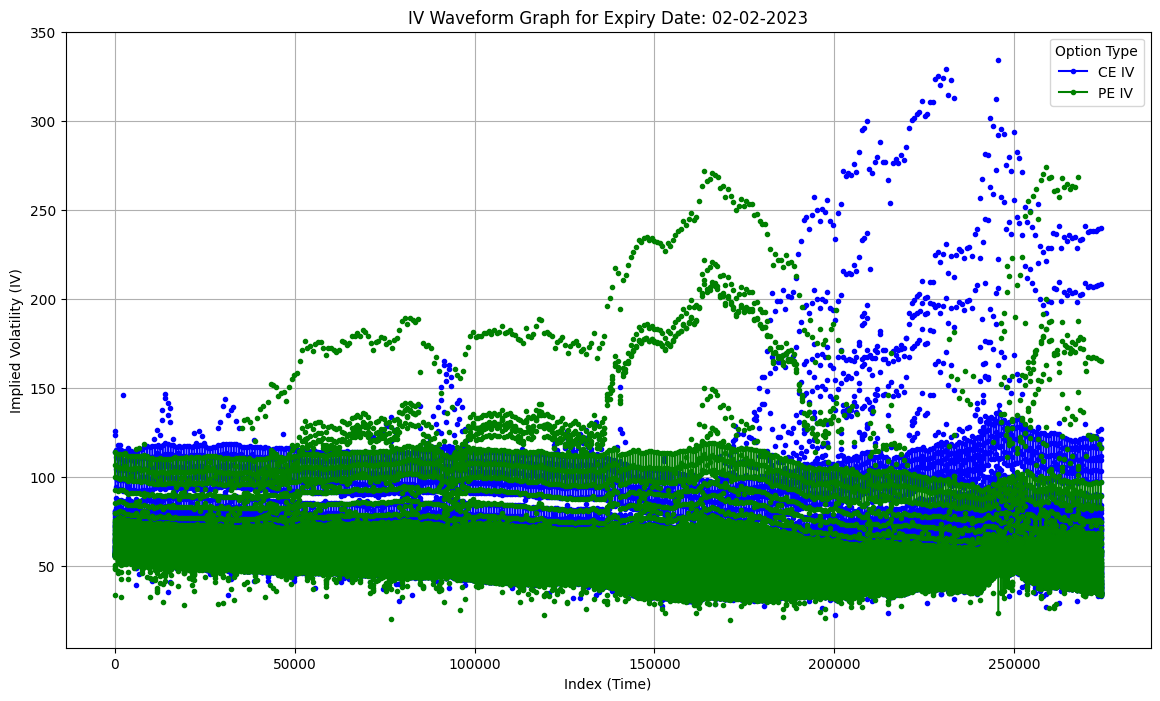

In [13]:
 
import matplotlib.pyplot as plt
 
# Plot CE_IV and PE_IV as line plots with markers for better visualization
plt.figure(figsize=(14, 8))
plt.plot(
    df_expiry_date_02_02_2023.index, 
    df_expiry_date_02_02_2023["CE_IV"], 
    label="CE IV", 
    marker=".", 
    linestyle="-", 
    color="blue"
)
plt.plot(
    df_expiry_date_02_02_2023.index, 
    df_expiry_date_02_02_2023["PE_IV"], 
    label="PE IV", 
    marker=".", 
    linestyle="-", 
    color="green"
)
 
# Add title, labels, legend, and grid
plt.title("IV Waveform Graph for Expiry Date: 02-02-2023")
plt.xlabel("Index (Time)")
plt.ylabel("Implied Volatility (IV)")
plt.legend(title="Option Type")
plt.grid(True)
 
# Show the plot
plt.show()
 

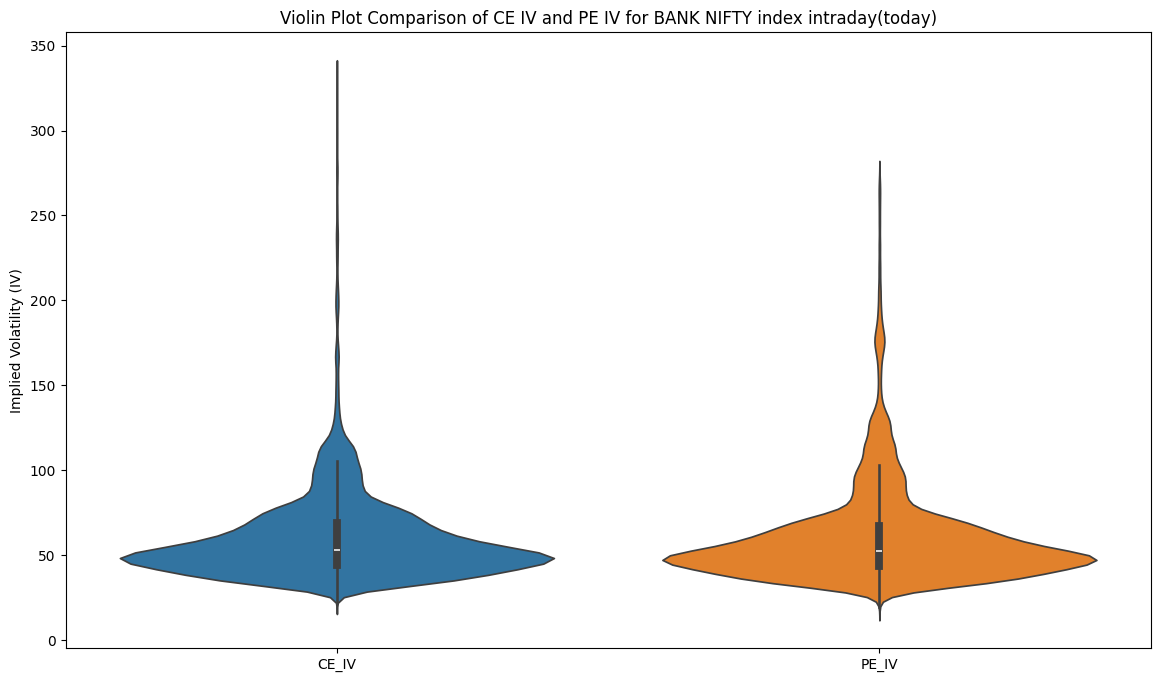

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Create a DataFrame for easier violin plot comparison
iv_data = pd.DataFrame({
    "CE_IV": df_expiry_date_02_02_2023["CE_IV"],
    "PE_IV": df_expiry_date_02_02_2023["PE_IV"]
})
 
# Violin plot for better distribution visualization
plt.figure(figsize=(14, 8))
sns.violinplot(data=iv_data)
 
# Add title and labels
plt.title("Violin Plot Comparison of CE IV and PE IV for BANK NIFTY index intraday(today)")
plt.ylabel("Implied Volatility (IV)")
 
# Show the plot
plt.show()

In [15]:
dd=df_expiry_date_02_02_2023["STRIKE_PR"]
dd
strike_price_counts = dd.value_counts()
 
# Display the counts
print(dd[:20])
print(strike_price_counts)
 

3     35500
4     36000
5     36500
6     37000
7     37000
8     37500
9     37500
10    37600
11    37700
12    37800
13    37900
14    38000
15    38000
16    38100
17    38200
18    38300
19    38400
20    38400
21    38500
22    38500
Name: STRIKE_PR, dtype: int64
STRIKE_PR
38000    752
37500    752
37000    752
39000    752
39100    752
        ... 
46500    376
47000    376
47500    376
48000    376
48500    376
Name: count, Length: 91, dtype: int64


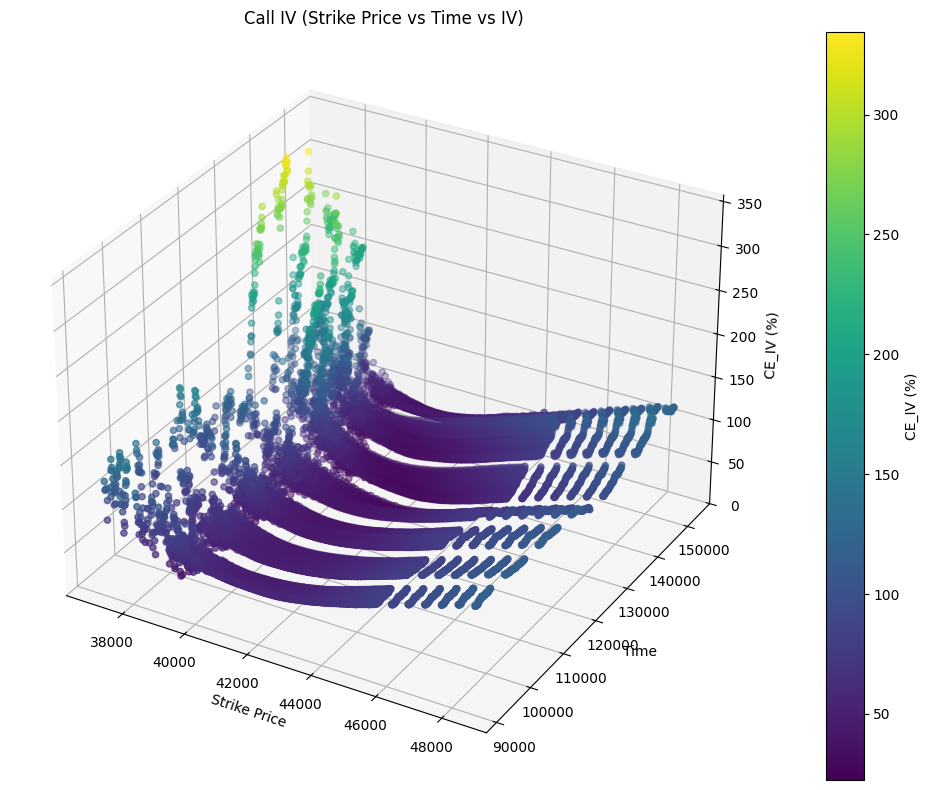

In [16]:

from mpl_toolkits.mplot3d import Axes3D
 
# 3D Scatter Plot
def plot_3d_iv(iv_column, title):
    df_plot = df_expiry_date_02_02_2023[['STRIKE_PR', 'Time', iv_column]].dropna()
 
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(df_plot['STRIKE_PR'], df_plot['Time'], df_plot[iv_column], c=df_plot[iv_column], cmap='viridis')
 
    ax.set_title(f"{title} (Strike Price vs Time vs IV)")
    ax.set_xlabel("Strike Price")
    ax.set_ylabel("Time")
    ax.set_zlabel(f"{iv_column} (%)")
    fig.colorbar(scatter, ax=ax, label=f"{iv_column} (%)")
    plt.tight_layout()
    plt.show()
 
# 3D Plot for Call IV (CE_IV)
plot_3d_iv('CE_IV', 'Call IV')
 

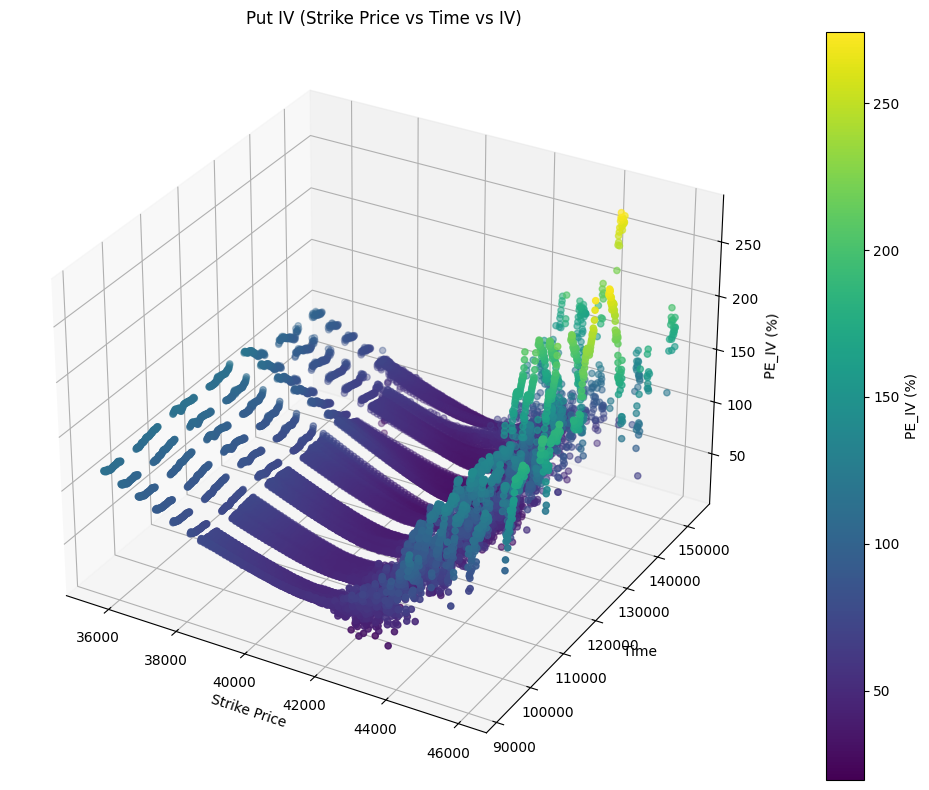

In [17]:
 
plot_3d_iv('PE_IV', 'Put IV')
 
 

NameError: name 'mdates' is not defined

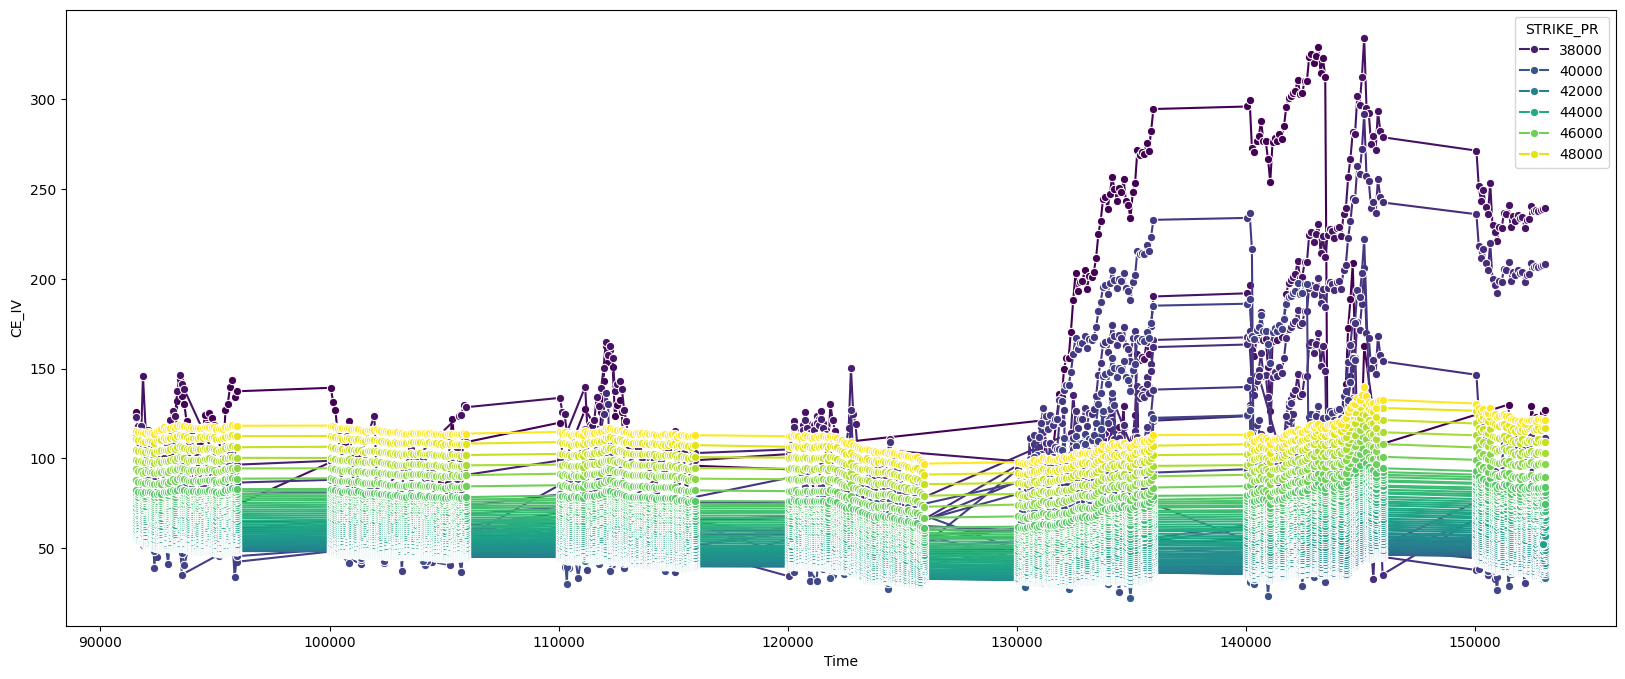

In [18]:


def plot_line_iv(iv_column, title):
    df_plot = df_expiry_date_02_02_2023[['STRIKE_PR', 'Time', iv_column]].dropna()
    
    plt.figure(figsize=(20, 8))  # Increase figure size for better visibility
 
    # Create the line plot using seaborn
    sns.lineplot(data=df_plot, x='Time', y=iv_column, hue='STRIKE_PR', marker='o', palette='viridis')
 
    # Set x-ticks for Time with larger intervals (e.g., 30-minute intervals)
    plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=30))  # 30-minute intervals
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format to HH:MM
 
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)
 
    # Add titles and labels
    plt.title(f"{title} (IV Trends over Time)")
    plt.xlabel("Time")
    plt.ylabel(f"{iv_column} (%)")
 
    # Automatically adjust layout for better spacing
    plt.tight_layout()
 
    # Show the plot
    plt.show()
 
# Line Plot for Call IV (CE_IV)
plot_line_iv('CE_IV', 'Call IV')

NameError: name 'mdates' is not defined

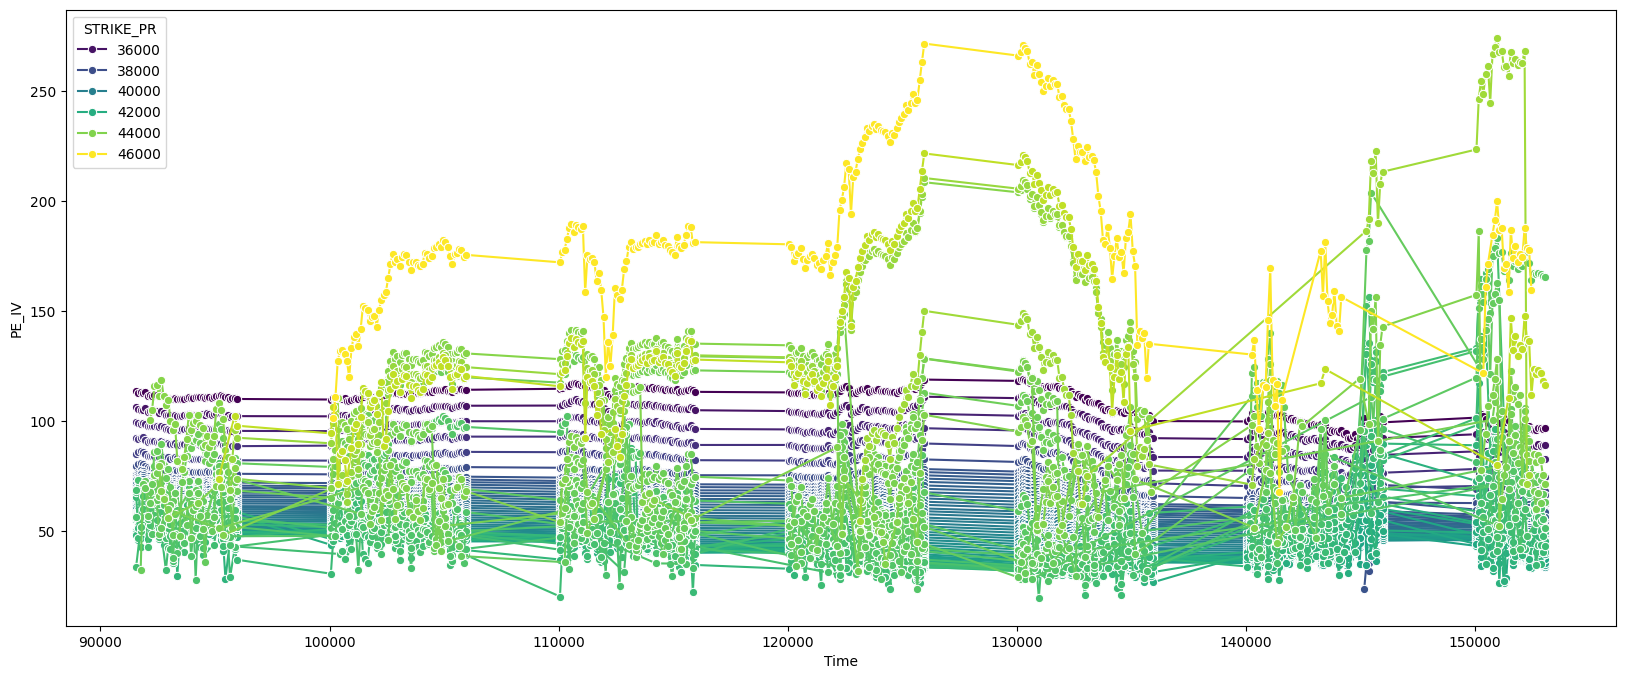

In [19]:
# Line Plot for Put IV (PE_IV)
plot_line_iv('PE_IV', 'Put IV')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9772\2522322130.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_expiry_date_02_02_2023, x='STRIKE_PR', y=iv_column, palette='viridis')


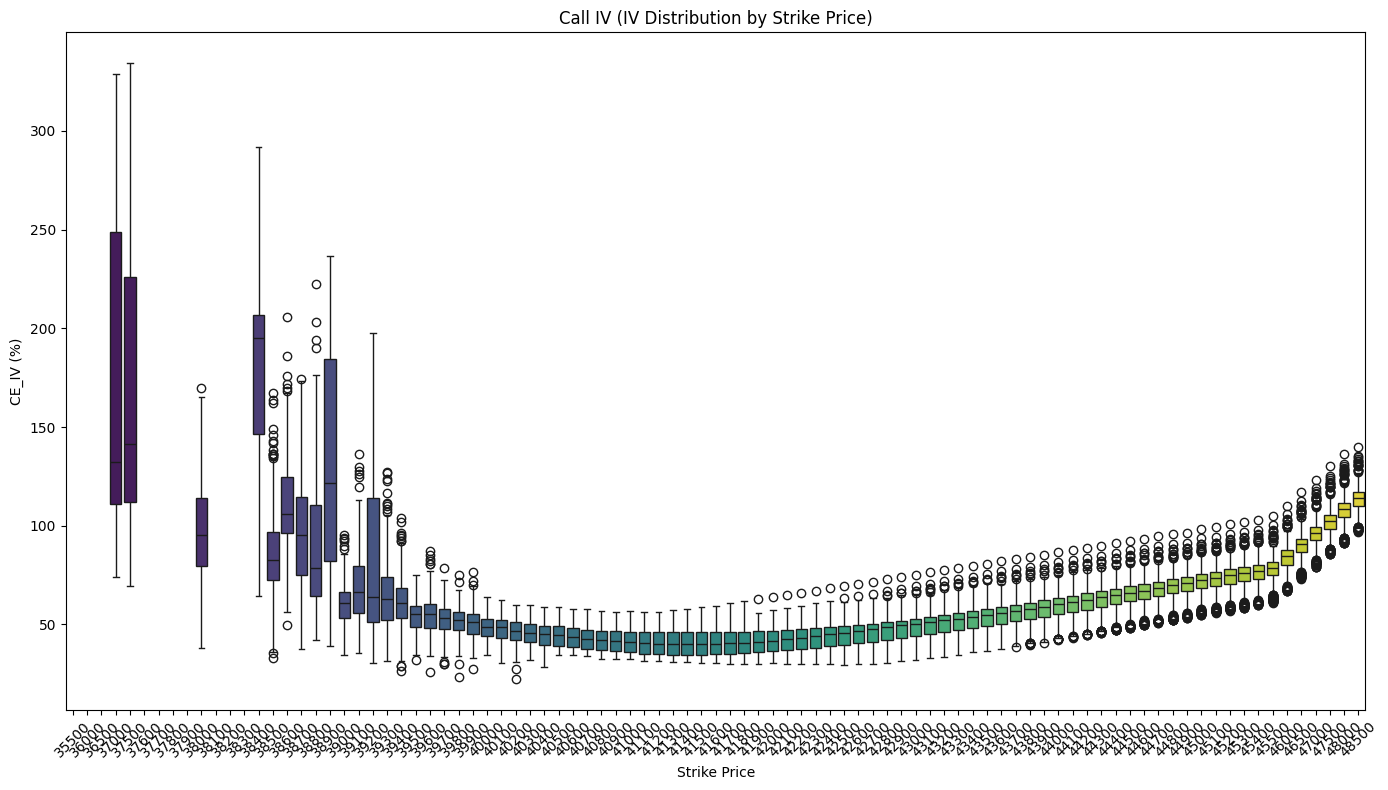

In [20]:

# Box Plot for IV Distribution by Strike Price
def plot_box_iv(iv_column, title):
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_expiry_date_02_02_2023, x='STRIKE_PR', y=iv_column, palette='viridis')
    plt.title(f"{title} (IV Distribution by Strike Price)")
    plt.xlabel("Strike Price")
    plt.ylabel(f"{iv_column} (%)")
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
    plt.tight_layout()
    plt.show()
 
# Box Plot for Call IV (CE_IV)
plot_box_iv('CE_IV', 'Call IV')
 
 
 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9772\2522322130.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_expiry_date_02_02_2023, x='STRIKE_PR', y=iv_column, palette='viridis')


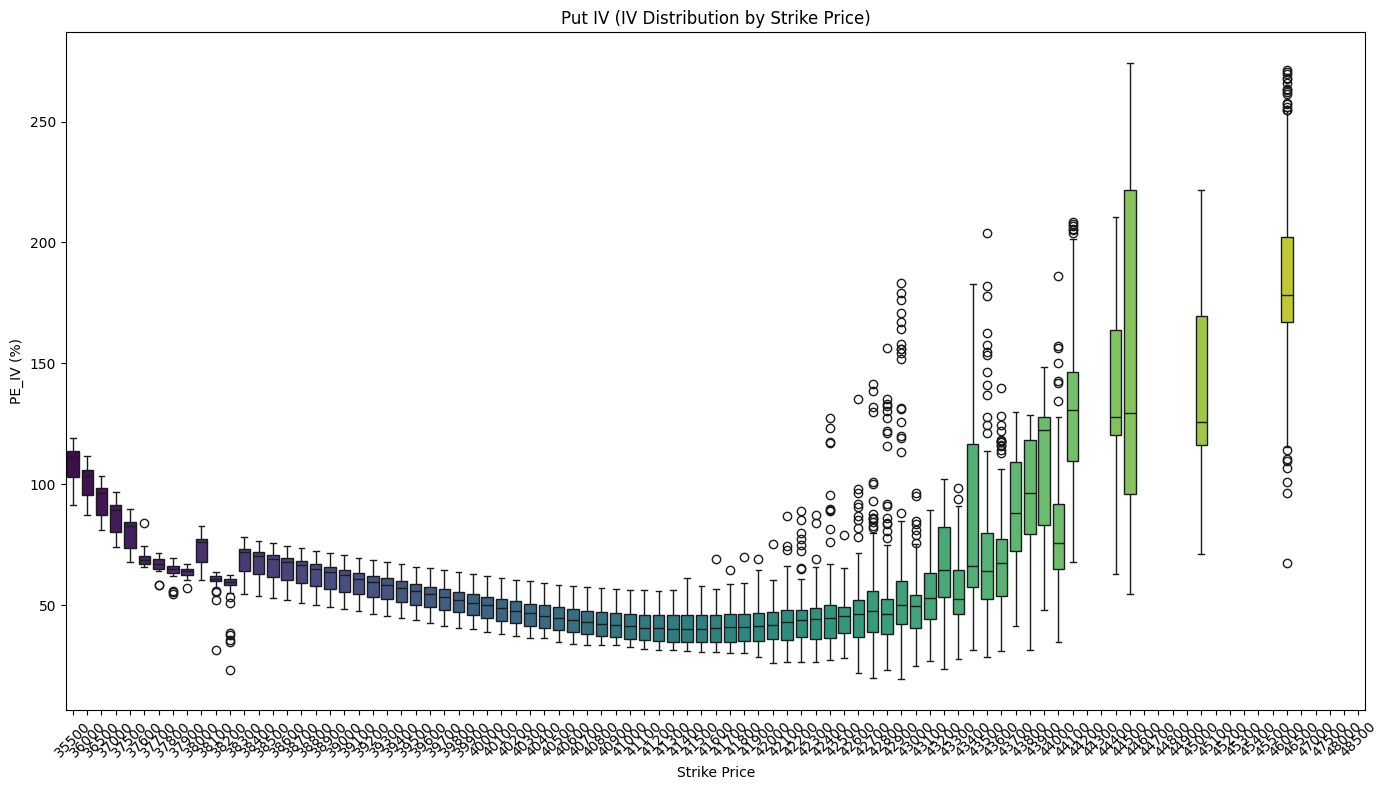

In [21]:
 
# Box Plot for Put IV (PE_IV)
plot_box_iv('PE_IV', 'Put IV')

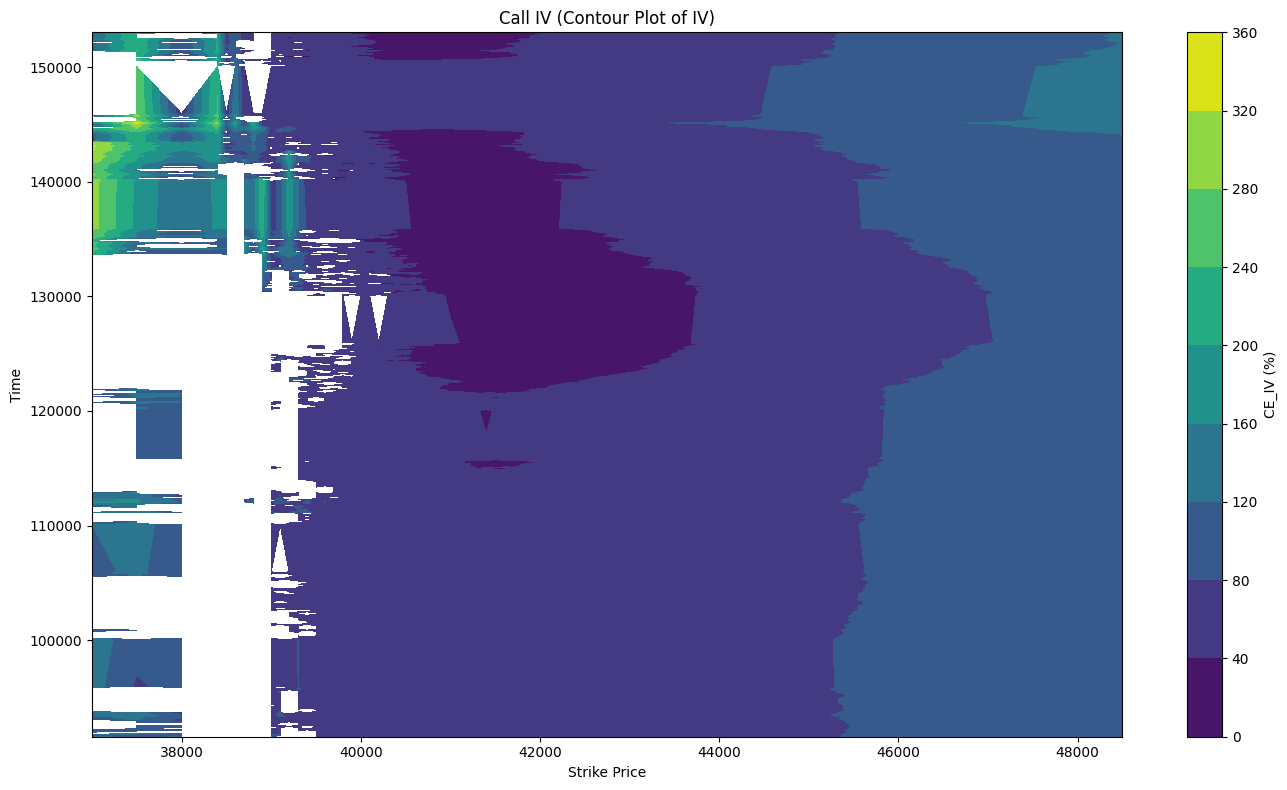

In [22]:

# Contour Plot for Call IV (CE_IV)
def plot_contour_iv(iv_column, title):
    heatmap_data = df_expiry_date_02_02_2023.pivot_table(index='Time', columns='STRIKE_PR', values=iv_column, aggfunc='mean')
    plt.figure(figsize=(14, 8))
    cp = plt.contourf(heatmap_data.columns, heatmap_data.index, heatmap_data.values, cmap='viridis')
    plt.colorbar(cp, label=f"{iv_column} (%)")
    plt.title(f"{title} (Contour Plot of IV)")
    plt.xlabel("Strike Price")
    plt.ylabel("Time")
    plt.tight_layout()
    plt.show()
 
# Contour Plot for Call IV (CE_IV)
plot_contour_iv('CE_IV', 'Call IV')
 

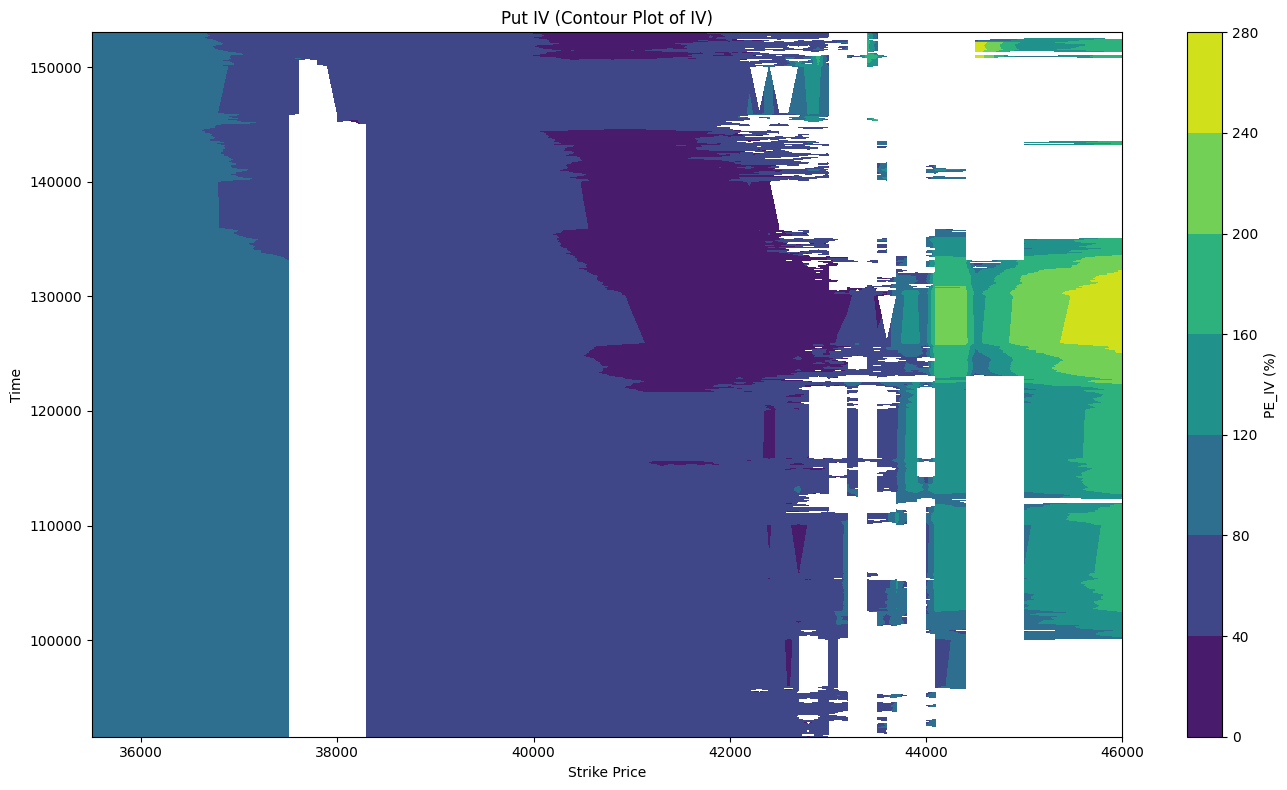

In [23]:
plot_contour_iv('PE_IV', 'Put IV')
 

chunk based on the ATM's
 

In [25]:
# get the all ATM strike price
tolerance = 0.5 
 
atm_strikes = df_expiry_date_02_02_2023[df_expiry_date_02_02_2023['STRIKE_PR'].between(df_expiry_date_02_02_2023['synthetic'] - tolerance, df_expiry_date_02_02_2023['synthetic'] + tolerance)]
 
 
atm_strike_list = atm_strikes['STRIKE_PR'].tolist()
 
print("ATM Strike Prices in the DataFrame:")
print(atm_strike_list)

ATM Strike Prices in the DataFrame:
[41300, 41300, 41300, 41300, 40600, 40600]


In [24]:
# df_expiry_date_02_02_2023_41300=df_expiry_date_02_02_2023.loc[(df_expiry_date_02_02_2023.STRIKE_PR==41300)]
# df_expiry_date_02_02_2023_41300

In [28]:
import matplotlib.dates as mdates


In [33]:

strike_price = int(input("Enter the strike price: "))
range_points = int(input("Enter the range of points for filtering: "))
 


Enter the strike price:  41300
Enter the range of points for filtering:  400


In [34]:
 
def plot_comparisons_for_strike(df, strike_price, range_points):
 
    df_filtered = df[(df['STRIKE_PR'] >= strike_price - range_points) & 
                     (df['STRIKE_PR'] <= strike_price + range_points)]
 
 
    if df_filtered.empty:
        print("No data available for the given range.")
        return
 
 
    df_calls = df_filtered[df_filtered['OPTION_TYP'] == 'CE']
    df_puts = df_filtered[df_filtered['OPTION_TYP'] == 'PE']
 
    return df_calls, df_puts, df_filtered
 
df_calls, df_puts, df_filtered = plot_comparisons_for_strike(df_expiry_date_02_02_2023, strike_price, range_points)
 
 
 
 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9772\3677915207.py:49: FutureWarning: The provided callable <function mean at 0x000001DD4D32C680> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = pd.pivot_table(df_filtered, values=['CE_IV', 'PE_IV'], index='STRIKE_PR', columns='OPTION_TYP', aggfunc=np.mean)


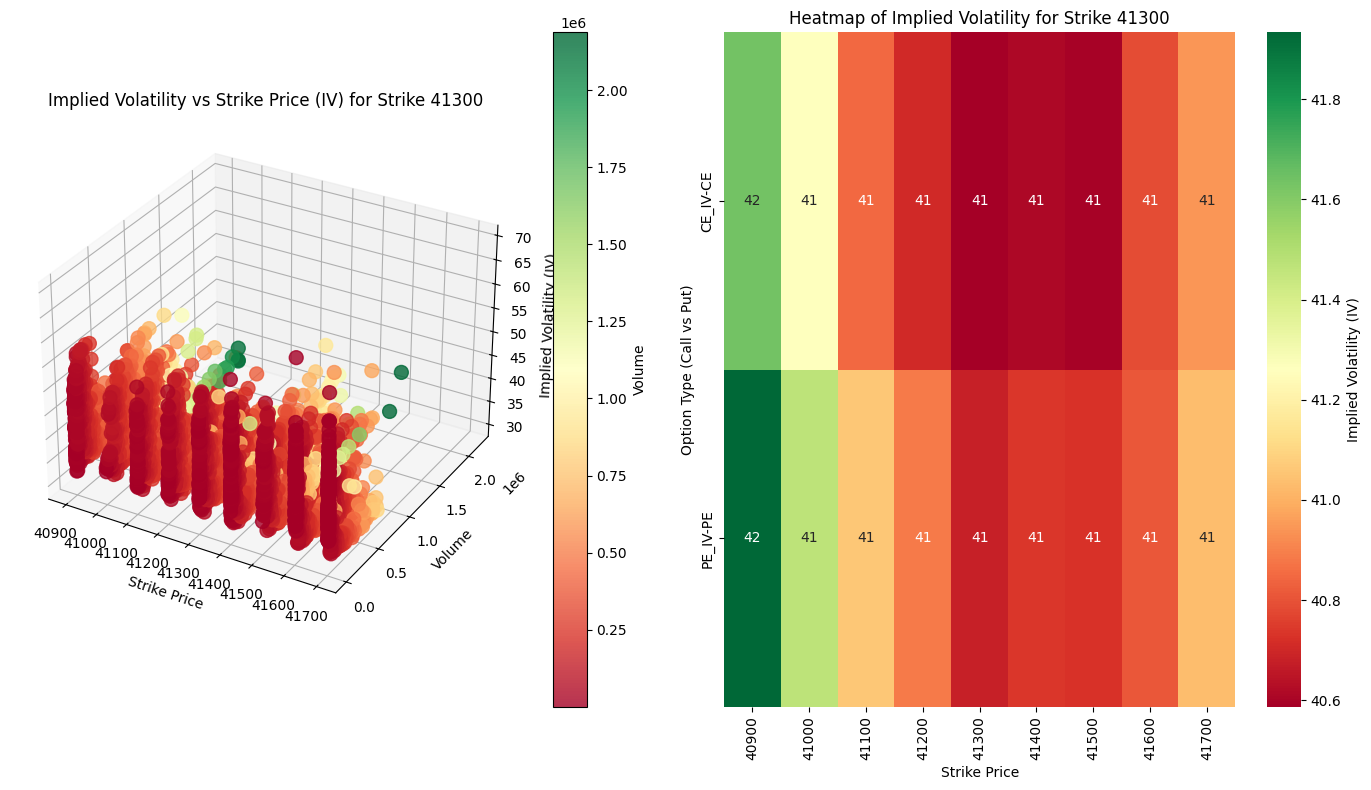

In [35]:

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
 
# Function to plot Call and Put IV on the same 3D plot and heatmap
def plot_call_put_iv(df, strike_price, range_points,df_calls, df_puts):
 
    # Create a 3D plot for IV vs. Strike Price
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(121, projection='3d')  # 3D plot on the left
 
    # Plot Calls
    scatter_calls = ax.scatter(
        df_calls['STRIKE_PR'], 
        df_calls['Volume'], 
        df_calls['CE_IV'], 
        c=df_calls['Volume'], 
        cmap='RdYlGn', 
        s=100, 
        alpha=0.8
    )
 
    # Plot Puts
    scatter_puts = ax.scatter(
        df_puts['STRIKE_PR'], 
        df_puts['Volume'], 
        df_puts['PE_IV'], 
        c=df_puts['Volume'], 
        cmap='RdYlGn', 
        s=100, 
        alpha=0.8
    )
 
    # Add color bar for 3D plot
    cbar = fig.colorbar(scatter_calls, ax=ax, label="Volume")
 
    # Set titles and labels for 3D plot
    ax.set_title(f"Implied Volatility vs Strike Price (IV) for Strike {strike_price}")
    ax.set_xlabel("Strike Price")
    ax.set_ylabel("Volume")
    ax.set_zlabel("Implied Volatility (IV)")
 
    # Create a heatmap for IV vs Strike Price
    ax2 = fig.add_subplot(122)  # Heatmap on the right
 
    # Prepare data for the heatmap
    heatmap_data = pd.pivot_table(df_filtered, values=['CE_IV', 'PE_IV'], index='STRIKE_PR', columns='OPTION_TYP', aggfunc=np.mean)
 
    # Plot heatmap
    sns.heatmap(heatmap_data.T, cmap='RdYlGn', annot=True, cbar_kws={'label': 'Implied Volatility (IV)'})
 
    # Set titles and labels for heatmap
    ax2.set_title(f"Heatmap of Implied Volatility for Strike {strike_price}")
    ax2.set_xlabel("Strike Price")
    ax2.set_ylabel("Option Type (Call vs Put)")
 
    # Show the plot
    plt.tight_layout()
    plt.show()
 
 
plot_call_put_iv(df_filtered, strike_price, range_points , df_calls, df_puts)
 
 

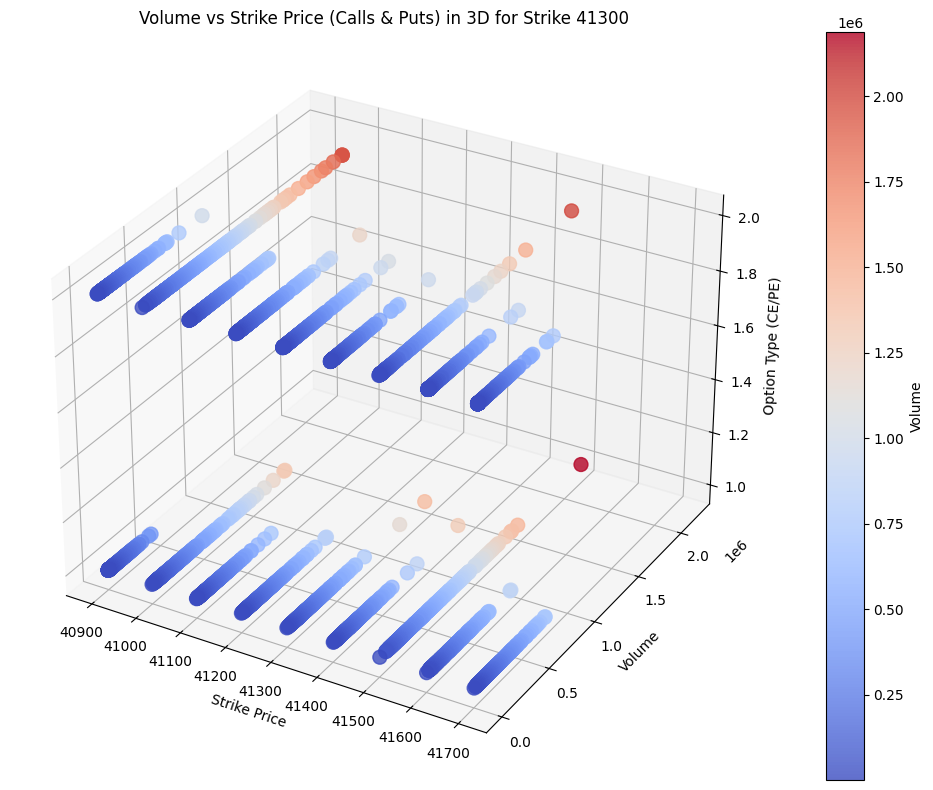

In [36]:

 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
def plot_volume_vs_strike_3d(df_filtered, strike_price):
    # Check for missing values and drop them
    df_filtered = df_filtered[['STRIKE_PR', 'Volume', 'OPTION_TYP']].dropna()
 
    # Map OPTION_TYP to numerical values for color coding
    option_type_map = {'CE': 1, 'PE': 2}  # Example mapping
    df_filtered['OPTION_TYP_NUM'] = df_filtered['OPTION_TYP'].map(option_type_map)
 
    # Create 3D plot
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(111, projection='3d')
 
    scatter = ax.scatter(
        df_filtered['STRIKE_PR'],
        df_filtered['Volume'],
        df_filtered['OPTION_TYP_NUM'],
        c=df_filtered['Volume'],  # Color mapped to volume
        cmap='coolwarm',
        s=100,
        alpha=0.8
    )
 
    # Add colorbar
    cbar = fig.colorbar(scatter, ax=ax, label="Volume")
 
    # Set axis labels and title
    ax.set_title(f"Volume vs Strike Price (Calls & Puts) in 3D for Strike {strike_price}")
    ax.set_xlabel("Strike Price")
    ax.set_ylabel("Volume")
    ax.set_zlabel("Option Type (CE/PE)")
 
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
 
# Example usage
plot_volume_vs_strike_3d(df_filtered, strike_price)
 

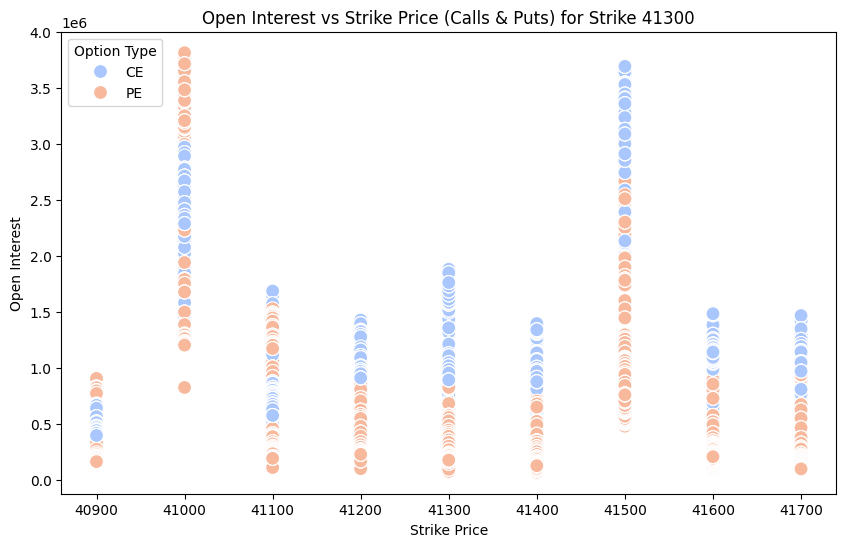

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9772\410487131.py:15: FutureWarning: The provided callable <function sum at 0x000001DD4D30F240> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  oi_heatmap_data = pd.pivot_table(df_filtered, values='OI', index='STRIKE_PR', columns='OPTION_TYP', aggfunc=np.sum)


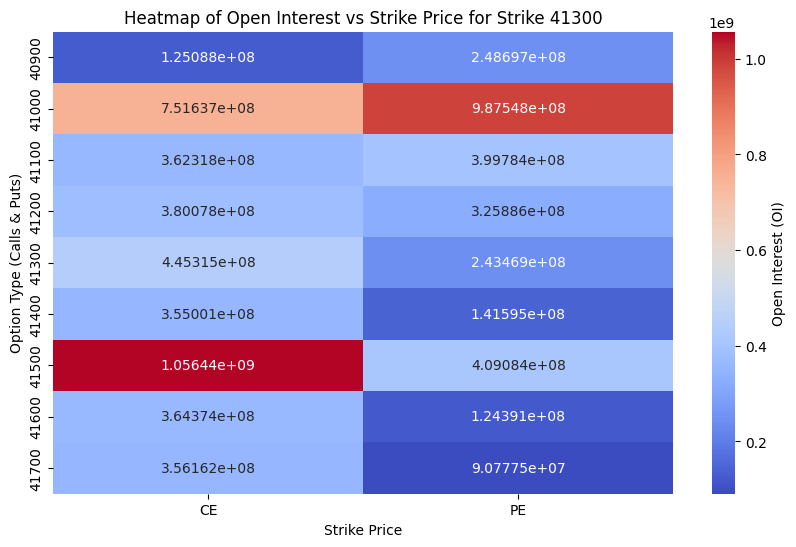

In [37]:

 
def plot_oi_vs_strike(df_filtered, strike_price):
    # Scatter Plot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='STRIKE_PR', y='OI', data=df_filtered, hue='OPTION_TYP', palette='coolwarm', s=100)
    plt.title(f"Open Interest vs Strike Price (Calls & Puts) for Strike {strike_price}")
    plt.xlabel("Strike Price")
    plt.ylabel("Open Interest")
    plt.legend(title="Option Type", loc='upper left')
    plt.show()
 
    # Heatmap Visualization for OI vs Strike Price
    plt.figure(figsize=(10, 6))
 
    # Prepare a pivot table to aggregate OI by Strike Price and Option Type
    oi_heatmap_data = pd.pivot_table(df_filtered, values='OI', index='STRIKE_PR', columns='OPTION_TYP', aggfunc=np.sum)
 
    # Plot the heatmap
    sns.heatmap(oi_heatmap_data, cmap='coolwarm', annot=True, fmt="g", cbar_kws={'label': 'Open Interest (OI)'})
 
    # Titles and labels for heatmap
    plt.title(f"Heatmap of Open Interest vs Strike Price for Strike {strike_price}")
    plt.xlabel("Strike Price")
    plt.ylabel("Option Type (Calls & Puts)")
    plt.show()
 
# Sample function call with your filtered data
plot_oi_vs_strike(df_filtered, strike_price)
 
 

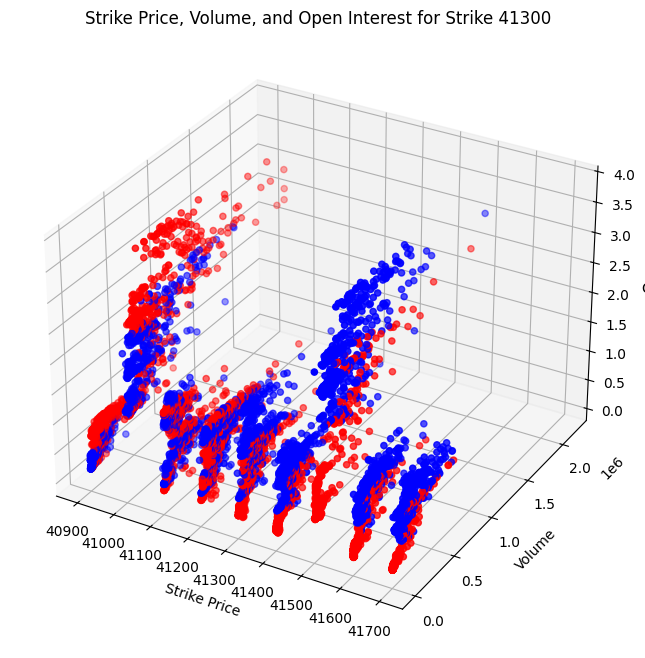

In [38]:

def plot_3d_strike_volume_oi(df_filtered, strike_price):
 
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
 
    ax.scatter(df_filtered['STRIKE_PR'], df_filtered['Volume'], df_filtered['OI'], 
               c=df_filtered['OPTION_TYP'].apply(lambda x: 'blue' if x == 'CE' else 'red'), label='Options')
    ax.set_xlabel("Strike Price")
    ax.set_ylabel("Volume")
    ax.set_zlabel("OI")
    ax.set_title(f"Strike Price, Volume, and Open Interest for Strike {strike_price}")
    plt.show()
 
 
 
plot_3d_strike_volume_oi(df_filtered, strike_price)
 
 
 

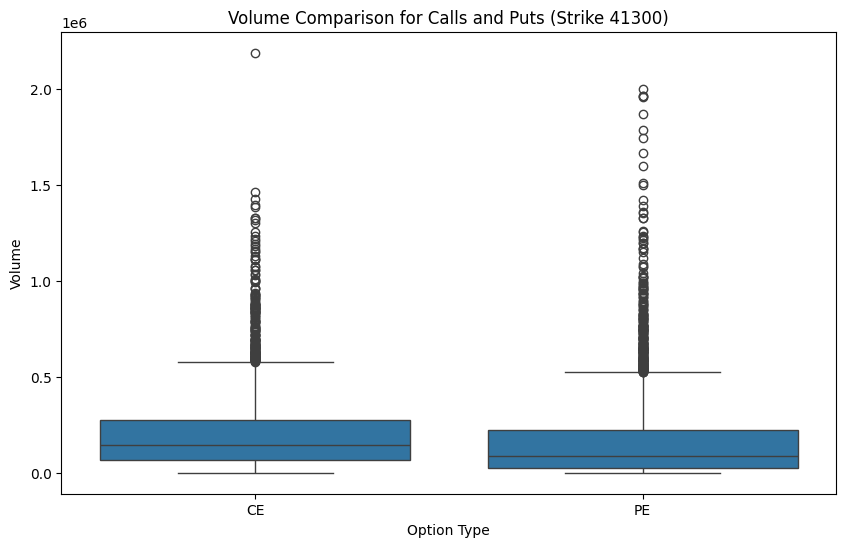

In [39]:
def plot_boxplot_volume(df_filtered, strike_price):
 
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='OPTION_TYP', y='Volume', data=df_filtered)
    plt.title(f"Volume Comparison for Calls and Puts (Strike {strike_price})")
    plt.xlabel("Option Type")
    plt.ylabel("Volume")
    plt.show()
 
 
 
plot_boxplot_volume(df_filtered, strike_price)
 

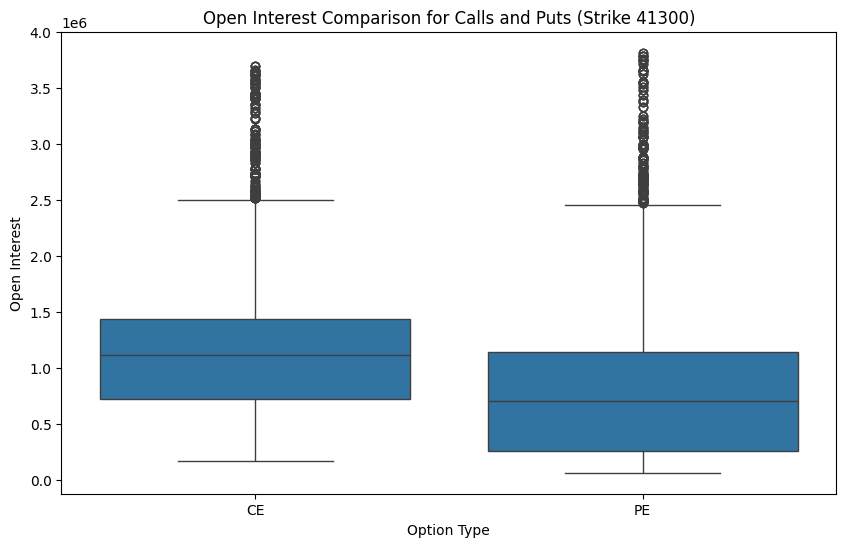

In [40]:
def plot_boxplot_oi(df_filtered, strike_price):
 
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='OPTION_TYP', y='OI', data=df_filtered)
    plt.title(f"Open Interest Comparison for Calls and Puts (Strike {strike_price})")
    plt.xlabel("Option Type")
    plt.ylabel("Open Interest")
    plt.show()
 
 
 
plot_boxplot_oi(df_filtered, strike_price)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9772\3727086782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calls['Option_Type'] = 'Call'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9772\3727086782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_puts['Option_Type'] = 'Put'


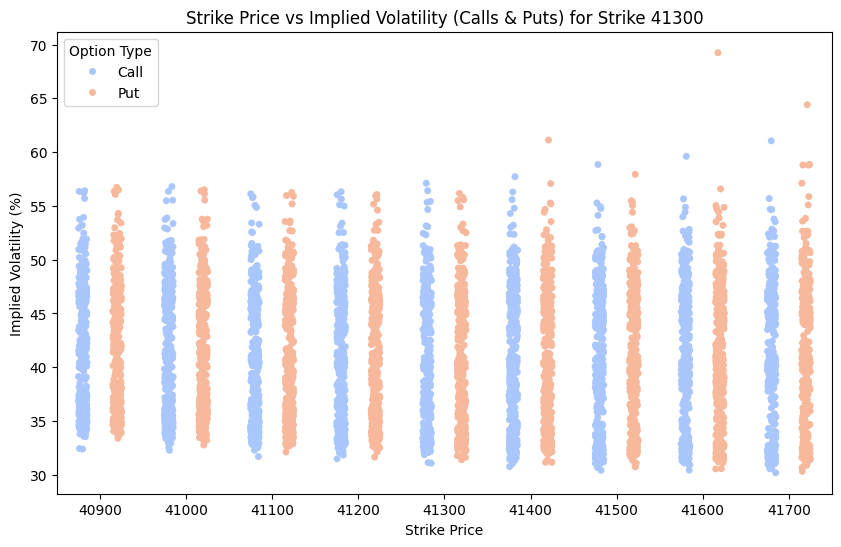

In [41]:
 
def plot_strike_vs_iv(df_calls, df_puts, strike_price):
    # Add Option_Type column to differentiate between Calls and Puts
    df_calls['Option_Type'] = 'Call'
    df_puts['Option_Type'] = 'Put'
 
    # Concatenate the two dataframes
    df_combined = pd.concat([df_calls[['STRIKE_PR', 'CE_IV', 'Option_Type']],
                             df_puts[['STRIKE_PR', 'PE_IV', 'Option_Type']].rename(columns={'PE_IV': 'CE_IV'})])
 
    # Create a strip plot for Strike Price vs Implied Volatility
    plt.figure(figsize=(10, 6))
    sns.stripplot(x='STRIKE_PR', y='CE_IV', data=df_combined, hue='Option_Type', palette='coolwarm', dodge=True, jitter=True)
 
    plt.title(f"Strike Price vs Implied Volatility (Calls & Puts) for Strike {strike_price}")
    plt.xlabel("Strike Price")
    plt.ylabel("Implied Volatility (%)")
    plt.legend(title="Option Type")
    plt.show()
 
plot_strike_vs_iv(df_calls, df_puts, strike_price)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9772\1478203199.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calls['Option_Type'] = 'Call'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9772\1478203199.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_puts['Option_Type'] = 'Put'


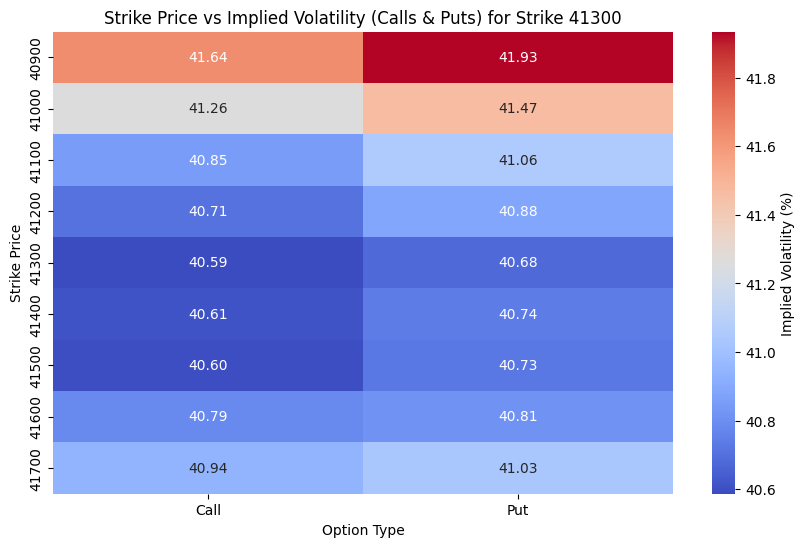

In [42]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
 
def plot_strike_vs_iv(df_calls, df_puts, strike_price):
    # Add Option_Type column to differentiate between Calls and Puts
    df_calls['Option_Type'] = 'Call'
    df_puts['Option_Type'] = 'Put'
 
    # Concatenate the two dataframes
    df_combined = pd.concat([df_calls[['STRIKE_PR', 'CE_IV', 'Option_Type']],
                             df_puts[['STRIKE_PR', 'PE_IV', 'Option_Type']].rename(columns={'PE_IV': 'CE_IV'})])
 
    # Pivot the data to create a matrix
    df_pivot = df_combined.pivot_table(index='STRIKE_PR', columns='Option_Type', values='CE_IV', aggfunc='mean')
 
    # Create a heatmap for Strike Price vs Implied Volatility
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_pivot, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Implied Volatility (%)'})
 
    plt.title(f"Strike Price vs Implied Volatility (Calls & Puts) for Strike {strike_price}")
    plt.xlabel("Option Type")
    plt.ylabel("Strike Price")
    plt.show()
 
plot_strike_vs_iv(df_calls, df_puts, strike_price)

COMPARE WITH DIFFERENT EXPIRY OF THE SAME STRIKE PRICE 

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'EXPIRY_DATE' is in datetime format
df['expiry'] = pd.to_datetime(df['expiry'], format='%Y-%m-%d')

# Fill missing values in the 'atm_straddle' column (if any)
df['atm_straddle'] = df['atm_straddle'].fillna(0)

# Set tolerance for ATM strikes
tolerance = 0.5

# Filter ATM strikes based on the 'synthetic' price
atm_strikes = df[df['STRIKE_PR'].between(df['synthetic'] - tolerance, df['synthetic'] + tolerance)]

# Extract ATM strike prices and ensure only positive numbers are in the list
atm_strike_list = atm_strikes['STRIKE_PR'].tolist()
atm_strike_list = [strike for strike in atm_strike_list if strike > 0]


# Filter ATM data from the original dataframe
atm_data = df[df['STRIKE_PR'].isin(atm_strike_list)]



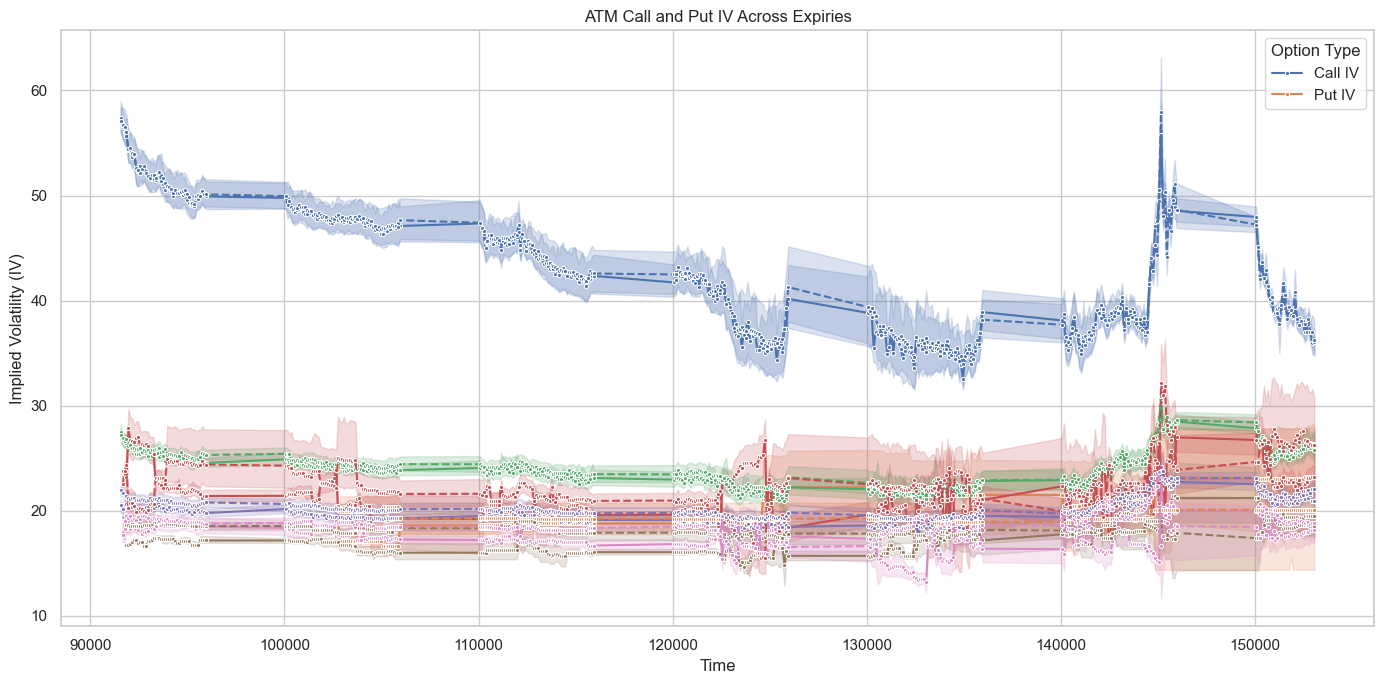

In [45]:
# Set Seaborn Style
sns.set(style="whitegrid")

# Plot ATM Call IV
plt.figure(figsize=(14, 7))
sns.lineplot(data=atm_data, x='Time', y='CE_IV', hue='expiry', marker='.')

# Plot ATM Put IV
sns.lineplot(data=atm_data, x='Time', y='PE_IV', hue='expiry', marker='.', linestyle='--')

# Customizing legend manually
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:2], labels=["Call IV", "Put IV"], title='Option Type')

# Titles and labels
plt.title('ATM Call and Put IV Across Expiries')
plt.xlabel('Time')
plt.ylabel('Implied Volatility (IV)')
plt.tight_layout()
plt.show()


3D PLOT

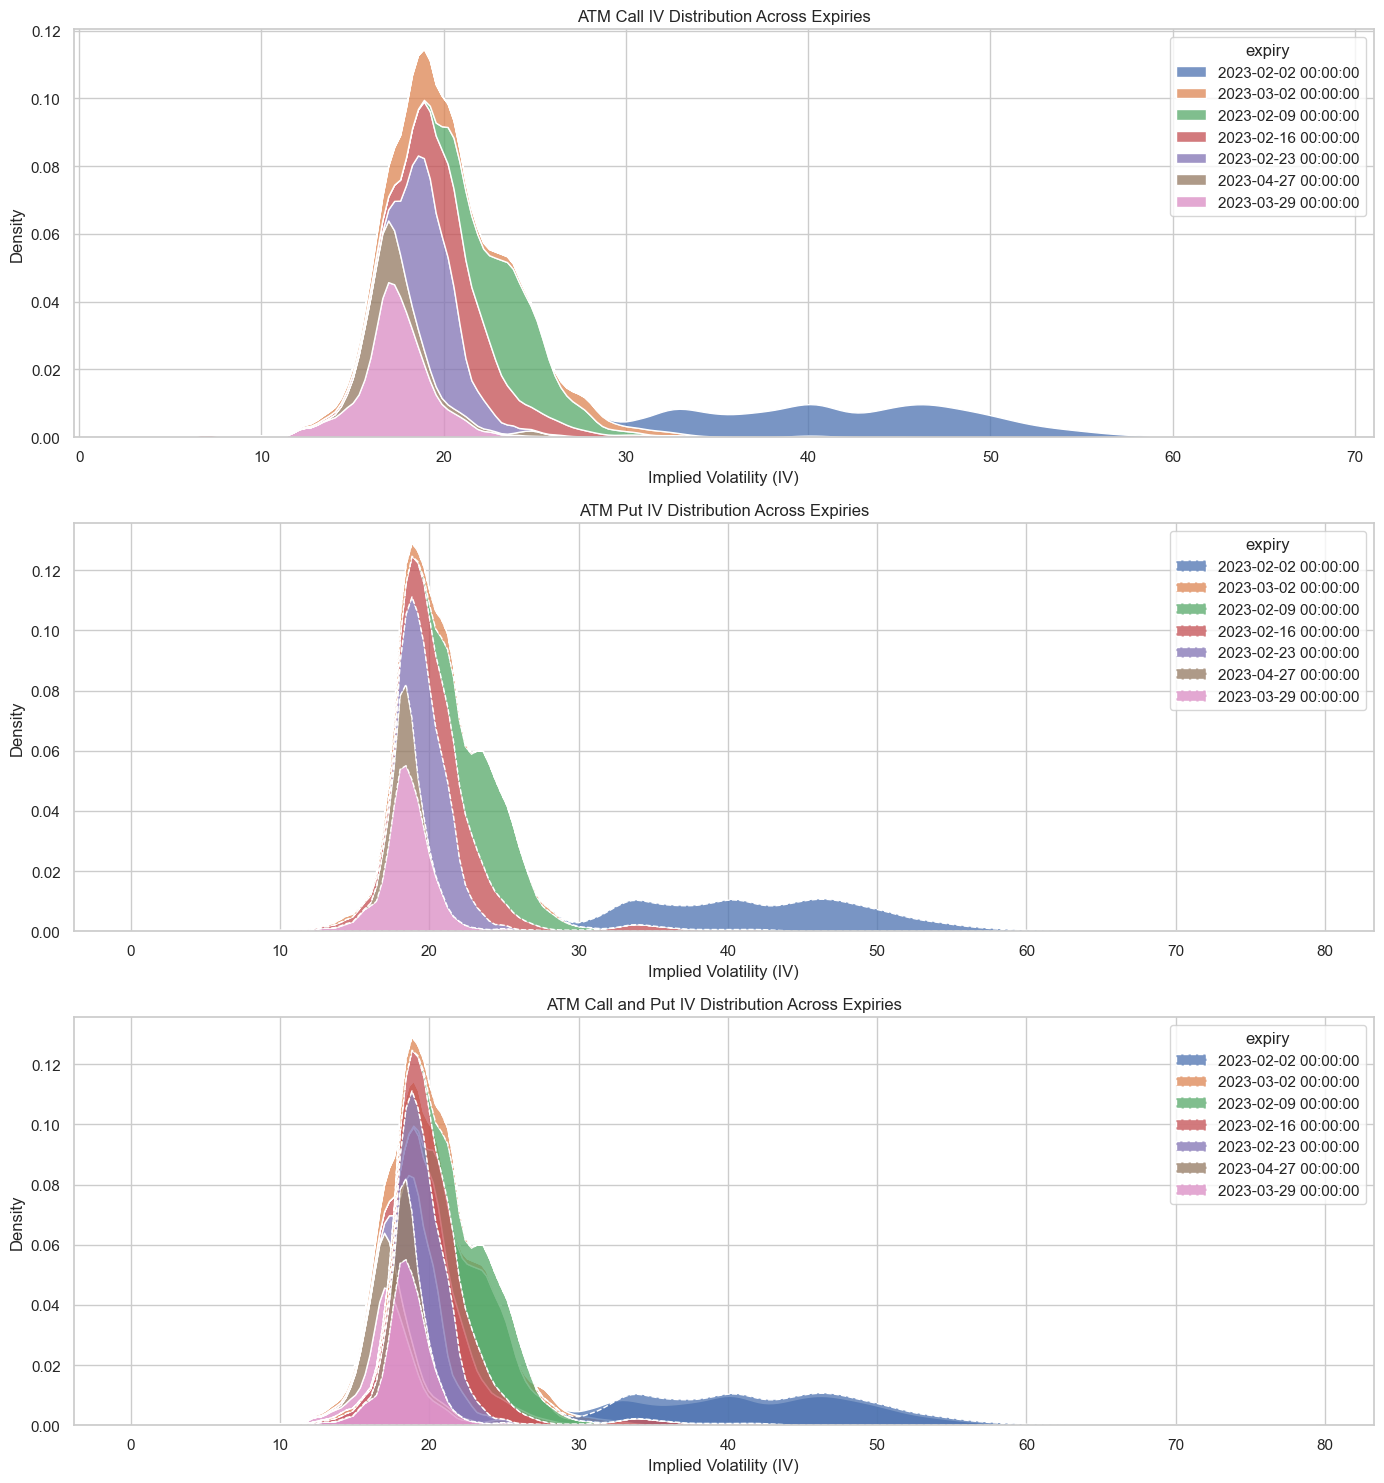

In [46]:


# Fill missing values in the 'atm_straddle' column (if any)
df['atm_straddle'] = df['atm_straddle'].fillna(0)

# Set tolerance for ATM strikes
tolerance = 0.5

# Filter ATM strikes based on the 'synthetic' price
atm_strikes = df[df['STRIKE_PR'].between(df['synthetic'] - tolerance, df['synthetic'] + tolerance)]

# Extract ATM strike prices and ensure only positive numbers are in the list
atm_strike_list = atm_strikes['STRIKE_PR'].tolist()
atm_strike_list = [strike for strike in atm_strike_list if strike > 0]

# Filter ATM data from the original dataframe
atm_data = df[df['STRIKE_PR'].isin(atm_strike_list)]

# Set Seaborn Style
sns.set(style="whitegrid")

# Create 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 15))

# Plot 1: Call IV distribution
sns.kdeplot(data=atm_data, x='CE_IV', hue='expiry', multiple='stack', fill=True, ax=axes[0], label="Call IV")
axes[0].set_title('ATM Call IV Distribution Across Expiries')
axes[0].set_xlabel('Implied Volatility (IV)')
axes[0].set_ylabel('Density')

# Plot 2: Put IV distribution
sns.kdeplot(data=atm_data, x='PE_IV', hue='expiry', multiple='stack', fill=True, ax=axes[1], linestyle='--', label="Put IV")
axes[1].set_title('ATM Put IV Distribution Across Expiries')
axes[1].set_xlabel('Implied Volatility (IV)')
axes[1].set_ylabel('Density')

# Plot 3: Combined Call and Put IV distribution
sns.kdeplot(data=atm_data, x='CE_IV', hue='expiry', multiple='stack', fill=True, ax=axes[2], label="Call IV")
sns.kdeplot(data=atm_data, x='PE_IV', hue='expiry', multiple='stack', fill=True, linestyle='--', ax=axes[2], label="Put IV")
axes[2].set_title('ATM Call and Put IV Distribution Across Expiries')
axes[2].set_xlabel('Implied Volatility (IV)')
axes[2].set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<Figure size 1600x800 with 0 Axes>

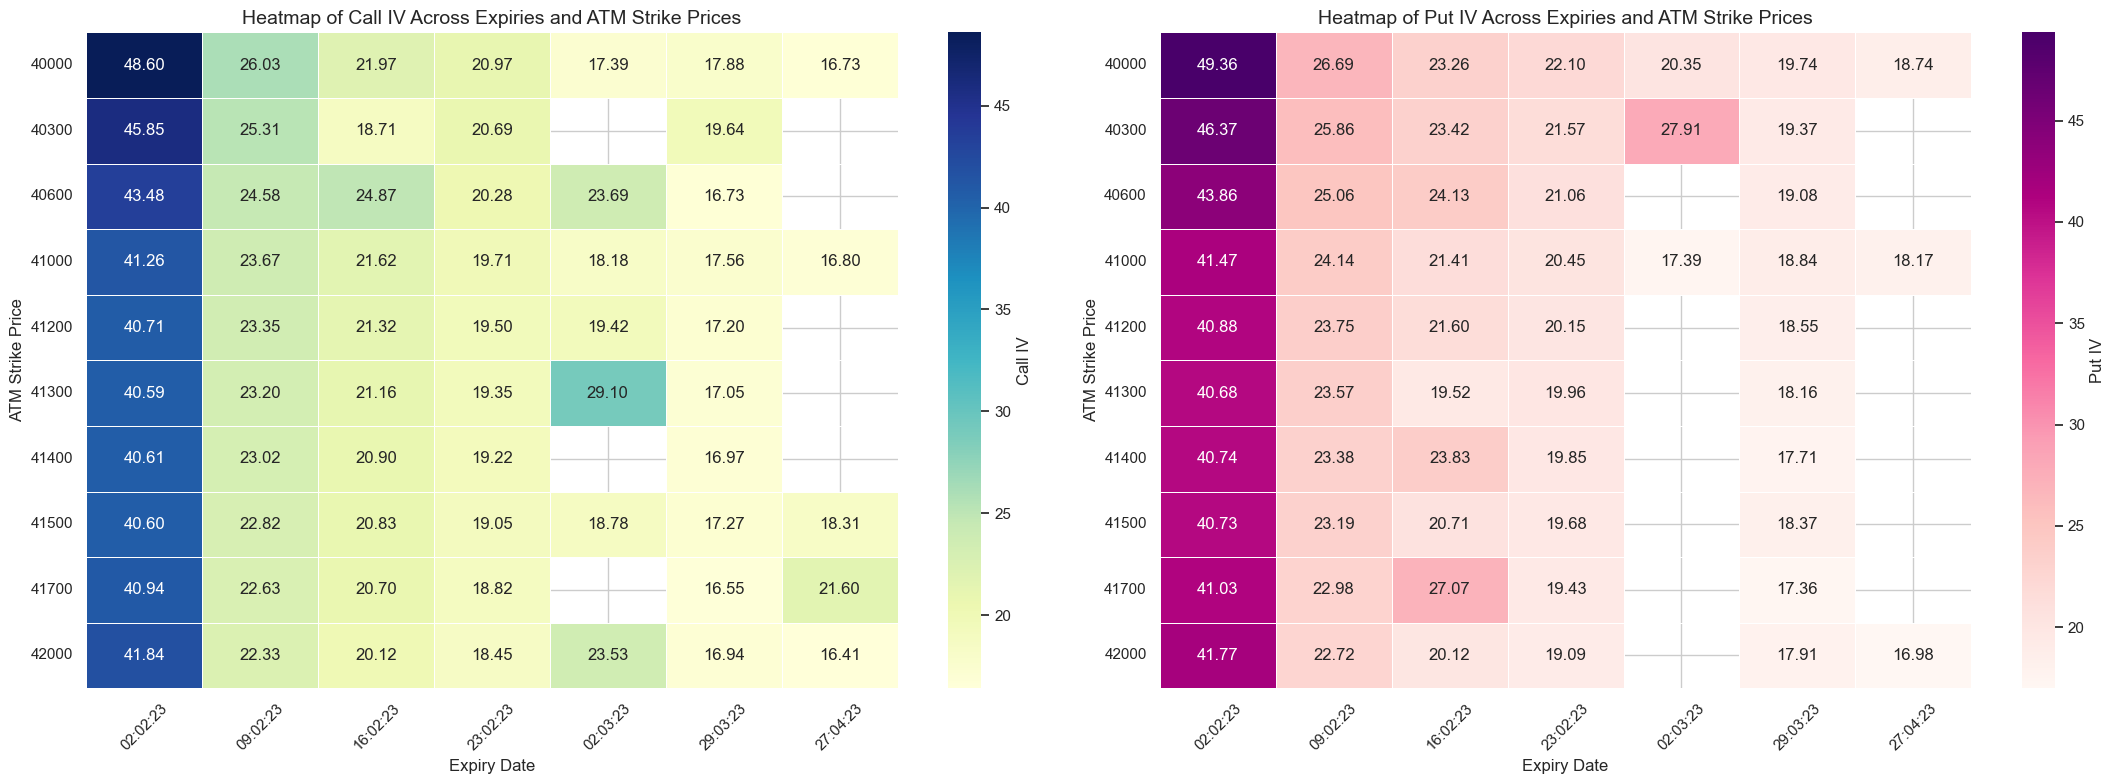

In [50]:


# Create Pivot Tables for both 'CE_IV' (Call IV) and 'PE_IV' (Put IV)
pivot_table_call = atm_data.pivot_table(index='STRIKE_PR', columns='expiry', values='CE_IV', aggfunc='mean')
pivot_table_put = atm_data.pivot_table(index='STRIKE_PR', columns='expiry', values='PE_IV', aggfunc='mean')


# Format the expiry date to dd:mm:yy
pivot_table_call.columns = pivot_table_call.columns.strftime('%d:%m:%y')
pivot_table_put.columns = pivot_table_put.columns.strftime('%d:%m:%y')

# Plot Heatmap for Call IV and Put IV with ATM Strike Prices
plt.figure(figsize=(16, 8))

# Create a subplot with 2 heatmaps: Call IV and Put IV
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

# Plot Call IV Heatmap
sns.heatmap(pivot_table_call, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Call IV'}, ax=axes[0], linewidths=0.5)
axes[0].set_title('Heatmap of Call IV Across Expiries and ATM Strike Prices', fontsize=14)
axes[0].set_xlabel('Expiry Date', fontsize=12)
axes[0].set_ylabel('ATM Strike Price', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility
axes[0].tick_params(axis='y', rotation=0)  # Keep y-axis labels horizontal

# Plot Put IV Heatmap
sns.heatmap(pivot_table_put, annot=True, fmt=".2f", cmap="RdPu", cbar_kws={'label': 'Put IV'}, ax=axes[1], linewidths=0.5)
axes[1].set_title('Heatmap of Put IV Across Expiries and ATM Strike Prices', fontsize=14)
axes[1].set_xlabel('Expiry Date', fontsize=12)
axes[1].set_ylabel('ATM Strike Price', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility
axes[1].tick_params(axis='y', rotation=0)  # Keep y-axis labels horizontal

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the heatmaps
plt.show()
